# Data Exploration of Read in bike_share_hour.csv as a pandas dataframe.

In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from prettytable import PrettyTable
from sklearn.model_selection import RandomizedSearchCV

PART 1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_share_hour.csv to bike_share_hour (5).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['bike_share_hour (5).csv']))
print(df)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [ ]:
categorical_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

non_null_counts = df.notnull().sum()
print("Non-Null Value Counts:")
print(non_null_counts)

Non-Null Value Counts:
instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64


In [ ]:
numeric_columns = df.select_dtypes(include=[int, float]).columns

numeric_summary = df[numeric_columns].describe()

print("\nDescriptive Analysis of Numeric Columns:")
print(numeric_summary)


Descriptive Analysis of Numeric Columns:
          instant          temp         atemp           hum     windspeed  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.496987      0.475775      0.627229      0.190098   
std     5017.0295      0.192556      0.171850      0.192930      0.122340   
min        1.0000      0.020000      0.000000      0.000000      0.000000   
25%     4345.5000      0.340000      0.333300      0.480000      0.104500   
50%     8690.0000      0.500000      0.484800      0.630000      0.194000   
75%    13034.5000      0.660000      0.621200      0.780000      0.253700   
max    17379.0000      1.000000      1.000000      1.000000      0.850700   

             casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
std       49.305030    151.357286    181.387599  
min        0.000000      0.000000      1.000000  
25%        4.0

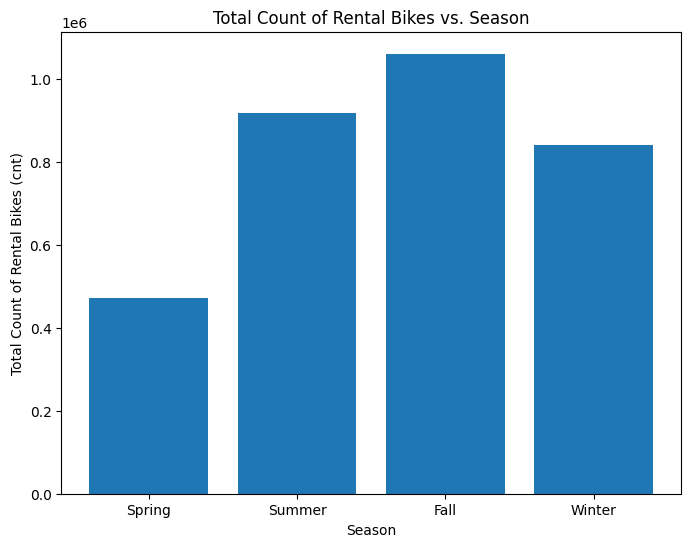

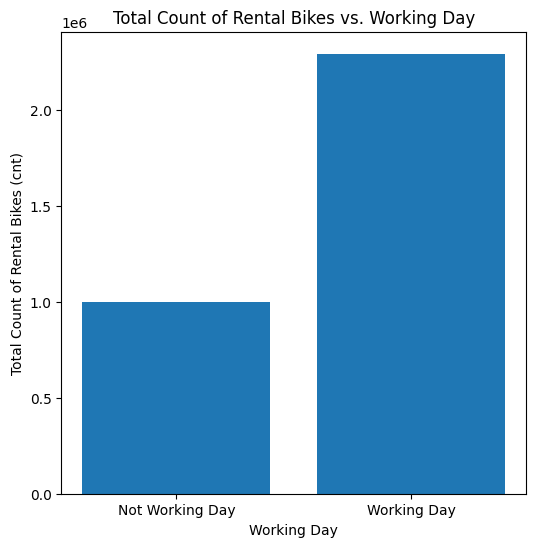

In [ ]:
# cnt versus season
plt.figure(figsize=(8, 6))
season_counts = df.groupby('season')['cnt'].sum()
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_labels, season_counts)
plt.xlabel('Season')
plt.ylabel('Total Count of Rental Bikes (cnt)')
plt.title('Total Count of Rental Bikes vs. Season')
plt.show()

# working day versus count
plt.figure(figsize=(6, 6))
workingday_counts = df.groupby('workingday')['cnt'].sum()
workingday_labels = ['Not Working Day', 'Working Day']
plt.bar(workingday_labels, workingday_counts)
plt.xlabel('Working Day')
plt.ylabel('Total Count of Rental Bikes (cnt)')
plt.title('Total Count of Rental Bikes vs. Working Day')
plt.show()

As we can see, Fall has the most number of bike rides while Spring has the least number of rides.
The bike rentals during working days are more than double of that during non-working days.

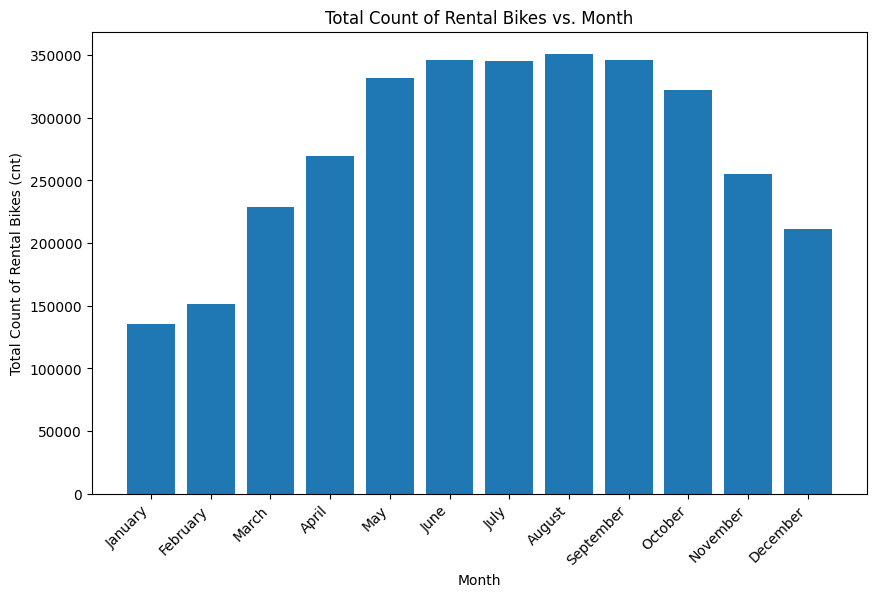

In [ ]:
monthly_counts = df.groupby('mnth')['cnt'].sum()

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
plt.bar(month_labels, monthly_counts)
plt.xlabel('Month')
plt.ylabel('Total Count of Rental Bikes (cnt)')
plt.title('Total Count of Rental Bikes vs. Month')
plt.xticks(rotation=45, ha='right')
plt.show()

We can clearly see from the bar chart that August has the most number of bike rides through out the year.

In [ ]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

seasons_data = df.groupby('season')['mnth'].unique()

for season, months in seasons_data.items():
    month_names = [month_mapping[month_num] for month_num in months]
    print(f"Season {season}: {', '.join(month_names)}")

Season 1: January, February, March, December
Season 2: March, April, May, June
Season 3: June, July, August, September
Season 4: September, October, November, December


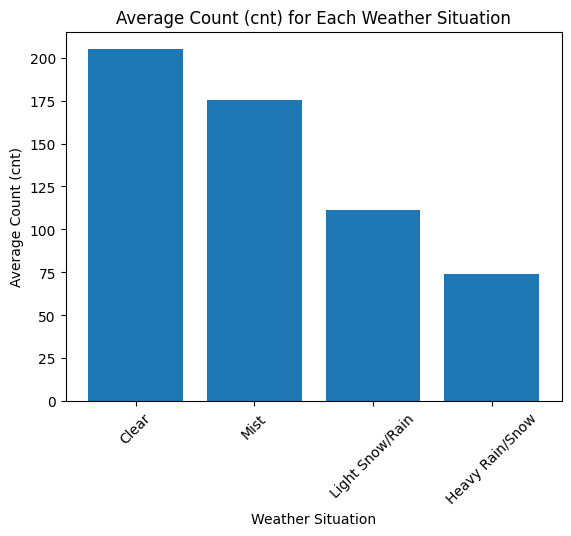

In [ ]:
weather_cnt_avg = df.groupby('weathersit')['cnt'].mean()

plt.bar(weather_cnt_avg.index, weather_cnt_avg.values)
plt.xlabel('Weather Situation')
plt.ylabel('Average Count (cnt)')
plt.title('Average Count (cnt) for Each Weather Situation')
plt.xticks(weather_cnt_avg.index, ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'], rotation=45)
plt.show()

The bar plot states the obvious that bike rentals are at their least during Heavy Rain/ Snow due to saftey hazards.

<ipython-input-25-85d6e9e631ed>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='weathersit', y='cnt', hue='season', ci=None)


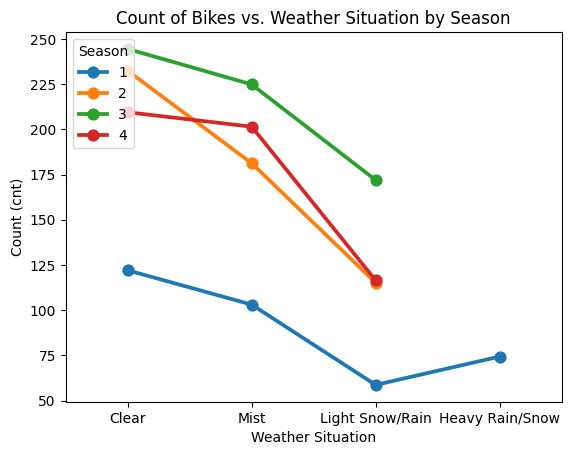

In [ ]:
sns.pointplot(data=df, x='weathersit', y='cnt', hue='season', ci=None)

plt.xlabel('Weather Situation')
plt.ylabel('Count (cnt)')
plt.title('Count of Bikes vs. Weather Situation by Season')

weather_labels = ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow']
plt.xticks([0, 1, 2, 3], weather_labels)
plt.legend(title='Season', loc='upper left')
plt.show()

The point plot helps us understand the the relation between the weather situations and seasons. We can clearly see that bike rentals are at their least during Light snow/Rain in Winter and at their highest during Clear conditions in Spring.

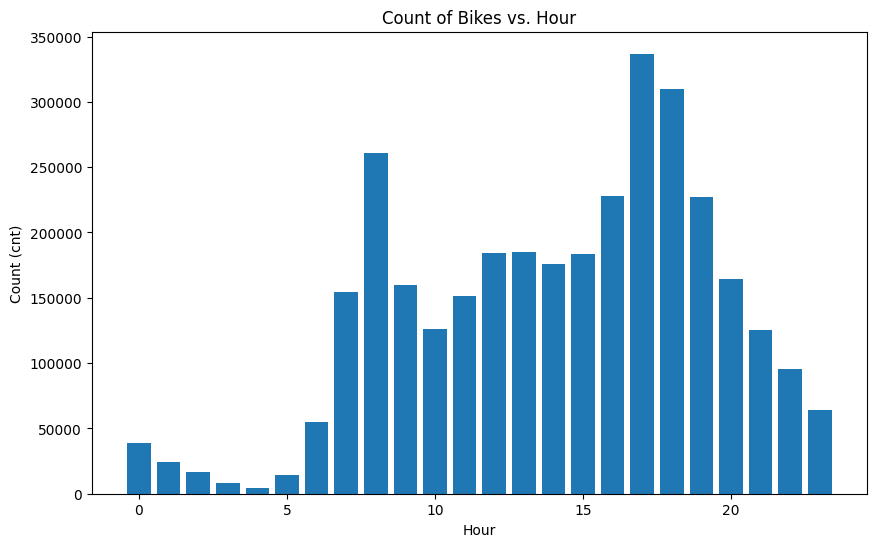

In [ ]:
hour_count = df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.bar(hour_count.index, hour_count.values)
plt.xlabel('Hour')
plt.ylabel('Count (cnt)')
plt.title('Count of Bikes vs. Hour')
plt.show()

From the bar plot we can assess that, bike rentals are at their peak during 5pm / 17:00 hour during the entire day.

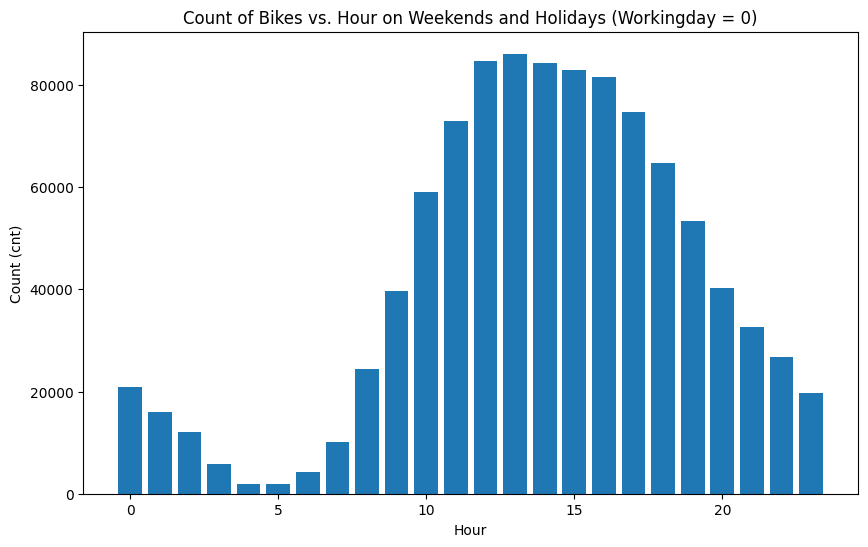

In [ ]:
weekend_holiday_data = df[df['workingday'] == 0]

hour_count_weekend_holiday = weekend_holiday_data.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.bar(hour_count_weekend_holiday.index, hour_count_weekend_holiday.values)
plt.xlabel('Hour')
plt.ylabel('Count (cnt)')
plt.title('Count of Bikes vs. Hour on Weekends and Holidays (Workingday = 0)')
plt.show()

We can observe from the above bar plot that there is a change in hourly trend at 1 pm / 13:00 hour between weekends and holidays.

PART 2

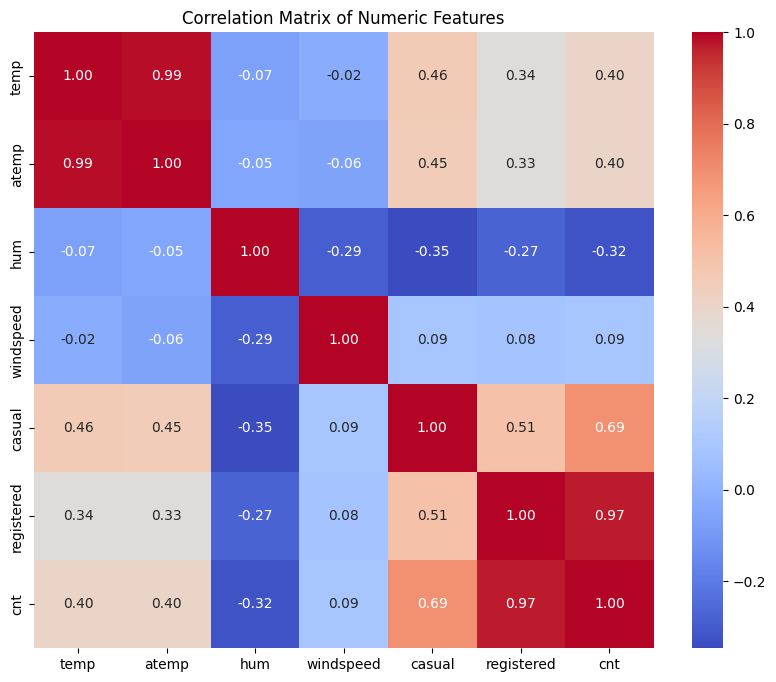

In [ ]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
numeric_data = df[numeric_columns]

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

We can observe a strong positive correlation between temperature and apparent temperature, indicating that they are highly related.

In [ ]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
numeric_data = df[numeric_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

scaled_df = pd.DataFrame(scaled_data, index=numeric_data.index, columns=numeric_columns)
df[numeric_columns] = scaled_df

columns_to_drop = ['casual', 'registered', 'dteday', 'instant']
df.drop(columns=columns_to_drop, inplace=True)
print(df.head())

  season yr mnth hr holiday weekday workingday weathersit      temp     atemp  \
0      1  0    1  0       0       6          0          1 -1.334648 -1.093281   
1      1  0    1  1       0       6          0          1 -1.438516 -1.181732   
2      1  0    1  2       0       6          0          1 -1.438516 -1.181732   
3      1  0    1  3       0       6          0          1 -1.334648 -1.093281   
4      1  0    1  4       0       6          0          1 -1.334648 -1.093281   

        hum  windspeed       cnt  
0  0.947372  -1.553889 -0.956339  
1  0.895539  -1.553889 -0.824022  
2  0.895539  -1.553889 -0.868128  
3  0.636370  -1.553889 -0.972879  
4  0.636370  -1.553889 -1.039037  


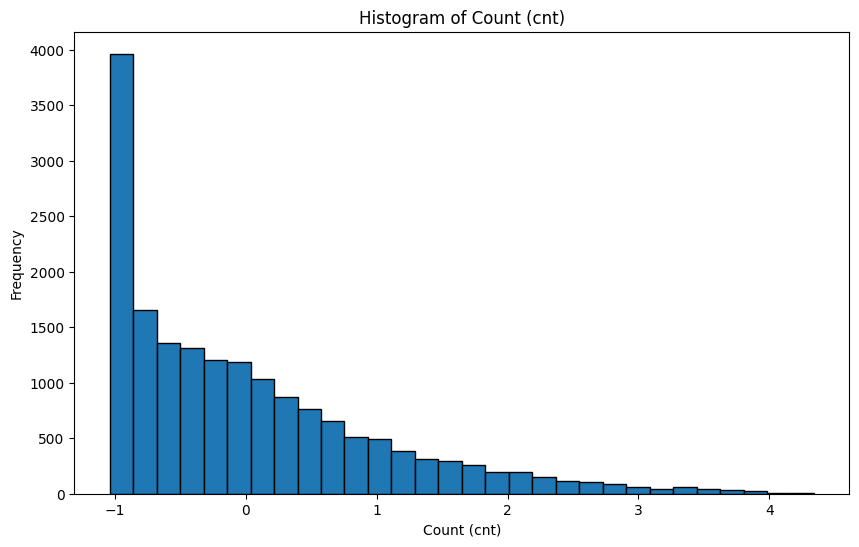

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['cnt'], bins=30, edgecolor='black')
plt.xlabel('Count (cnt)')
plt.ylabel('Frequency')
plt.title('Histogram of Count (cnt)')
plt.show()

The histogram has a positive skew, indicating that higher count values occur less frequently, while lower count values are more common. The distribution is right-tailed, suggesting that there are a few instances of high count values, possibly corresponding to peak usage periods, such as rush hours or holidays.

PART 3

In [ ]:
X = df.drop(columns=['cnt'])
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

r2_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [(-mse_score) ** 0.5 for mse_score in mse_scores]

print(f"Linear Model:")
print(f"Mean R-squared: {r2_scores.mean():.4f}")
print(f"Mean MSE: {-mse_scores.mean():.4f}")
print(f"Mean RMSE: {sum(rmse_scores) / len(rmse_scores):.4f}")

Linear Model:
Mean R-squared: 0.3851
Mean MSE: 0.6234
Mean RMSE: 0.7895


In [ ]:
categorical_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = pd.concat([df, df_encoded.drop(columns=['cnt'])], axis=1)
print(df.head())

  season yr mnth hr holiday weekday workingday weathersit      temp     atemp  \
0      1  0    1  0       0       6          0          1 -1.334648 -1.093281   
1      1  0    1  1       0       6          0          1 -1.438516 -1.181732   
2      1  0    1  2       0       6          0          1 -1.438516 -1.181732   
3      1  0    1  3       0       6          0          1 -1.334648 -1.093281   
4      1  0    1  4       0       6          0          1 -1.334648 -1.093281   

   ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
0  ...      False      False      False      False      False       True   
1  ...      False      False      False      False      False       True   
2  ...      False      False      False      False      False       True   
3  ...      False      False      False      False      False       True   
4  ...      False      False      False      False      False       True   

   workingday_1  weathersit_2  weathersit_3  weathersit_

In [ ]:
df = df.drop(columns=categorical_columns)

In [ ]:
X = df.drop(columns=['cnt'])
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
models = [
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)),
    ('RandomForestRegressor', RandomForestRegressor(random_state=0, n_estimators=30)),
    ('SGDRegressor', SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)),
    ('ElasticNet', ElasticNet(alpha=0.1, random_state=0)),
    ('Ridge', Ridge(alpha=0.5)),
    ('BaggingRegressor', BaggingRegressor(random_state=0))
]

results_table = PrettyTable()
results_table.field_names = ['Model', 'Mean R-squared', 'Mean MSE', 'Mean RMSE']

for model_name, model in models:
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [(-mse_score) ** 0.5 for mse_score in mse_scores]

    mean_r2 = r2_scores.mean()
    mean_mse = -mse_scores.mean()
    mean_rmse = sum(rmse_scores) / len(rmse_scores)

    results_table.add_row([model_name, mean_r2, mean_mse, mean_rmse])

print(results_table)

+-----------------------+---------------------+---------------------+---------------------+
|         Model         |    Mean R-squared   |       Mean MSE      |      Mean RMSE      |
+-----------------------+---------------------+---------------------+---------------------+
|    LinearRegression   |  0.5377105969749306 | 0.36020414499747827 |  0.5899499334072361 |
| DecisionTreeRegressor |  0.5493636914411356 | 0.33358558289283347 |  0.5732748369509553 |
| RandomForestRegressor |  0.7365747928109332 | 0.21049247197134205 | 0.45121398506302224 |
|      SGDRegressor     |  0.543869006196372  |  0.3679084131694726 |  0.5937636443140725 |
|       ElasticNet      | 0.10562476966823273 |  0.7824523191435757 |  0.8559583915629123 |
|         Ridge         |  0.5404360228615754 | 0.35937710641908305 |  0.5889883520875274 |
|    BaggingRegressor   |  0.7265922086697147 | 0.22075846538389304 |  0.4613421918231463 |
+-----------------------+---------------------+---------------------+-----------

I had an issue with my lasso regressor, so I did not add it in the pretty table and calculated it seperately below.

In [ ]:
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)

r2_scores_lasso = cross_val_score(lasso_regressor, X_train, y_train, cv=5, scoring='r2')
mse_scores_lasso = cross_val_score(lasso_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_lasso = [(-mse_score) ** 0.5 for mse_score in mse_scores_lasso]

print(f"Lasso Regressor:")
print(f"Mean R-squared: {r2_scores_lasso.mean():.4f}")
print(f"Mean MSE: {-mse_scores_lasso.mean():.4f}")
print(f"Mean RMSE: {sum(rmse_scores_lasso) / len(rmse_scores_lasso):.4f}")

Lasso Regressor:
Mean R-squared: 0.2416
Mean MSE: 0.7689
Mean RMSE: 0.8767


PART 4

In [ ]:
# Top three performing models
dt_regressor = DecisionTreeRegressor(random_state=0)
rf_regressor = RandomForestRegressor(random_state=0, n_estimators=30)
bagging_regressor = BaggingRegressor(random_state=0)

models = [dt_regressor, rf_regressor, bagging_regressor]
model_names = ["DecisionTreeRegressor", "RandomForestRegressor", "BaggingRegressor"]

for model, model_name in zip(models, model_names):
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [(-mse_score) ** 0.5 for mse_score in mse_scores]

    mean_r2 = np.mean(r2_scores)
    mean_mse = -np.mean(mse_scores)
    mean_rmse = np.mean(rmse_scores)

    print(f"{model_name}:")
    print(f"Mean R-squared: {mean_r2:.4f}")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean RMSE: {mean_rmse:.4f}")
    print()

DecisionTreeRegressor:
Mean R-squared: 0.5494
Mean MSE: 0.3336
Mean RMSE: 0.5733

RandomForestRegressor:
Mean R-squared: 0.7366
Mean MSE: 0.2105
Mean RMSE: 0.4512

BaggingRegressor:
Mean R-squared: 0.7266
Mean MSE: 0.2208
Mean RMSE: 0.4613



In [ ]:
# Top performfing model
param_distributions = {
    'bootstrap': [True, False],
    'max_depth': np.linspace(10, 110, 11, dtype=int),
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': np.linspace(200, 2000, 10, dtype=int)
}

random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best R-squared Score:", random_search.best_score_)

In [ ]:
# Best estimator
best_rf_model = random_search.best_estimator_

r2_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
mse_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_rf = [(-mse_score) ** 0.5 for mse_score in mse_scores_rf]

mean_r2_rf = r2_scores_rf.mean()
mean_mse_rf = -mse_scores_rf.mean()
mean_rmse_rf = np.mean(rmse_scores_rf)

print("Random Forest Regressor (Best Model):")
print(f"Mean R-squared: {mean_r2_rf:.4f}")
print(f"Mean MSE: {mean_mse_rf:.4f}")
print(f"Mean RMSE: {mean_rmse_rf:.4f}")

In [ ]:
# Predictions on test set
y_pred_rf = best_rf_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_rf)
rmse_test = mean_squared_error(y_test, y_pred_rf, squared=False)

print("Random Forest Regressor (Best Model) - Test Set:")
print(f"R-squared: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

The RandomForestRegressor was the best performing model from all the other models that were implemented. It had the lowest mean MSE and RMSE scores out the lot, hence why I chose it to run predictions on the test set.